# 구매 요인 분석 (Decision Tree)

Decision Tree 모델을 통하여 온라인 경매 아이템 판매 여부를 예측하고 각 변수의 영향도를 확인

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## 한글 폰트 설정
import os
os.name

import os
if os.name == 'posix' :
    plt.rc('font', family='AppleGothic')    # 맥
else:
    plt.rc('font', family='Malgun Gothic')  # 윈도우

# 마이너스 폰트 깨지는 문제애 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 더 선명해짐
%config InlineBackend.figure_font = 'retina'

In [3]:
# 데이터 불러오기
df = pd.read_csv("galaxy.csv")

print(df.shape)
df.head()

(1485, 9)


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [4]:
# 변수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [5]:
# 수치형 변수 확인
df.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


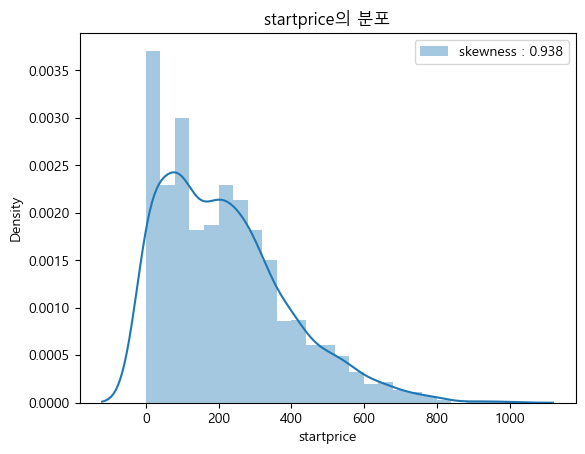

In [6]:
# startprice 분포 
sns.distplot(df['startprice'], label='skewness : {:.3f}'.format(df['startprice'].skew()))

plt.title('startprice의 분포')
plt.legend()
plt.show()

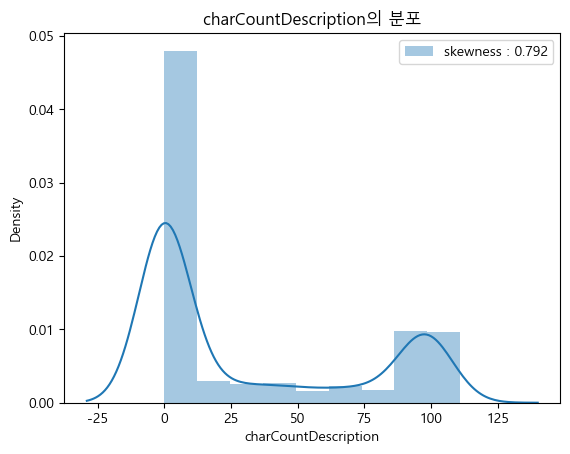

In [7]:
# charCountDescription 분포 
sns.distplot(df['charCountDescription'], label='skewness : {:.3f}'.format(df['charCountDescription'].skew()))

plt.title('charCountDescription의 분포')
plt.legend()
plt.show()

<Axes: xlabel='productline', ylabel='startprice'>

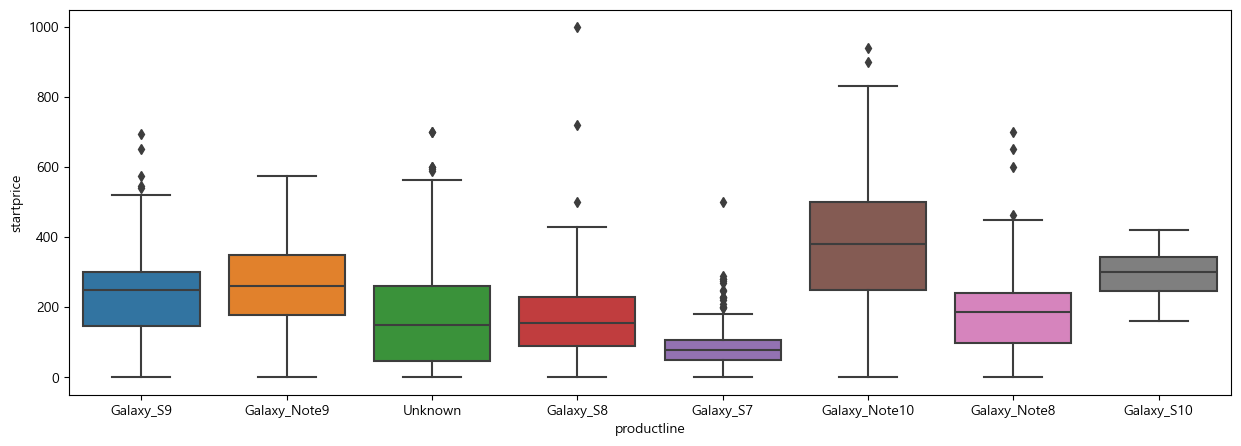

In [8]:
# 모델별 startprice 분포
plt.figure(figsize=(15, 5))

sns.boxplot(data=df, x='productline', y='startprice')

missing value

In [9]:
# 결측치 확인
df.isna().sum() / len(df) * 100

BuyItNow                 0.000000
startprice               0.000000
carrier                 78.720539
color                   39.932660
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

In [10]:
# 결측치 대체
df.fillna('Unknown', inplace=True)

# 확인
df.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,Unknown,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,Unknown,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Unknown,Space Gray,Galaxy_S8,contains description,0,0,1


In [11]:
df['carrier'].value_counts()

carrier
Unknown            1169
AT&T                177
Verizon              87
Sprint/T-Mobile      52
Name: count, dtype: int64

In [12]:
df['color'].value_counts()

color
Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

category 변수 처리